# Car Prices Prediction | Machine Learning

The purpose of this notebook is to create a model that best represents car prices variation of a given dataset.

## Table of Contents

<font color="red">**Red marks represent work in progress**</font>

#### Introduction
  * <a href="#1">Importing Libraries and Dataset</a>
  * <a href="#2">Dataset information and description</a>
  
#### Data Wrangling and Features decision

  * <a href="#3"> Basic Insights from Dataset</a>
  * <a href="#4"> Missing Data</a>
  * <a href="#5"> Data Standardization</a>
  * <a href="#6"> Data Normalization</a>
  * <a href="#7"> Mapping Variables</a>
  * <a href="#7.1"> Correlation and Causation</a>
  
  
##### Features approach

  * <a href="#8"> symboling</a>
  * <a href="#9"> normalized-losses</a>
  * <a href="#10"> make</a>
  * <a href="#11"> fuel-type</a> 
  * <a href="#12"> aspiration</a>
  * <a href="#13"> num-of-doors</a>  
  * <a href="#14"> body-style</a>
  * <a href="#15"> drive-wheels</a>
  * <a href="#16"> engine-location</a> 
  * <a href="#17"> Vehicles' Dimension</a>
  * <a href="#18"> engine-type</a> 
  * <a href="#19"> num-of-cylinders</a> 
  * <a href="#20"> fuel-system </a>    
  * <a href="#21"> bore</a> 
  * <a href="#22"> stroke </a> 
  * <a href="#23"> compression-ratio </a>     
  * <a href="#24"> horsepower   </a>   
  * <a href="#25"> peak-rpm </a> 
  * <a href="#26"> Fuel Economy </a> 
  * <a href="#27"> <b>Important Features </a>          
             
 <font color="red">        
     
</font>  

<a id='1'></a>
## Importing Libraries and Dataset

Firstly, let's import the dataset to python to have a better idea of what sort of information we have.

In [1]:
#importing libraries
import pandas as pd #to Manipulate Dataframe

import numpy as np #to Calculate Arrays

import matplotlib.pyplot as plt #for visualization
plt.style.use(['ggplot']) #graphs style
%matplotlib inline 

import seaborn as sns #for visualization

from scipy import stats #for statistics

import warnings #to eliminate matplot warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Marcello\Desktop\Projects\20190725_Car_Prices_Prediction\Dataset\fulldata.csv')
df.head(1)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


We can see that the headers were not included on the dataset. So, before moving ahead to analyse the data we are going to import the headers

In [3]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(35)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.80,101,5800,23,29,16430


<a id='2'></a>
## Dataset information and description
We can see from the head of the data set that we have some ordinal, categorical and continuos features.
Let's understand how this variables are storaged, type and missing values.

We know that our target variable is the column Prices. In this section we are going to understand a bit better about each feature in order to take a decision of whether to include them in our model or not.

In [4]:
#'''df.describe(include = "all") This command would include all the values that are not 
#numbers as well but for now lets analyse only the continuos variables'''
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
#note that many missing values are registered as '?' 
#let's organize them as NAN (not a number) so we can analyse missing values better
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

In [6]:
df.info()
print(df.shape) #understand how many columns x rows we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    164 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         202 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 200 non-null object
stroke               200 non-null object
compression-ratio    204 non-null float64
horsepower           202 non-nul

<a id='3'></a>
## Basic Insights from Dataset
Based on the summary above we can take a few conclusions:
- Missing Values
<ol>
    <li>"normalized-losses": 40 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

- Most of the data is categorical (type of objects)


- We have 25 features to predict 1 target(price)


- Full dataset is composed by 204 rows x 26 columns

In [7]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")    

False    204
Name: symboling, dtype: int64

False    164
True      40
Name: normalized-losses, dtype: int64

False    204
Name: make, dtype: int64

False    204
Name: fuel-type, dtype: int64

False    204
Name: aspiration, dtype: int64

False    202
True       2
Name: num-of-doors, dtype: int64

False    204
Name: body-style, dtype: int64

False    204
Name: drive-wheels, dtype: int64

False    204
Name: engine-location, dtype: int64

False    204
Name: wheel-base, dtype: int64

False    204
Name: length, dtype: int64

False    204
Name: width, dtype: int64

False    204
Name: height, dtype: int64

False    204
Name: curb-weight, dtype: int64

False    204
Name: engine-type, dtype: int64

False    204
Name: num-of-cylinders, dtype: int64

False    204
Name: engine-size, dtype: int64

False    204
Name: fuel-system, dtype: int64

False    200
True       4
Name: bore, dtype: int64

False    200
True       4
Name: stroke, dtype: int64

False    204
Name: compression-ratio, dtype: int64

F

<a id='4'></a>
## Missing Data
We are going to deal with missing data differently as some features are ordinal and others categorical.

<b>Replacing by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing values, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>



 ## <font color='red'>We can optimize this part checking make and model and maybe replacing missing values to the same car specification</font>

In [8]:
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_bore, inplace=True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)


<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, and it is most likely to occur</li>
        </ul>
    </li>
</ul>



In [9]:
print(df['num-of-doors'].value_counts()) #checking categories
print(df['num-of-doors'].value_counts().idxmax()) #finding which category repeats the most

#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

four    114
two      88
Name: num-of-doors, dtype: int64
four


<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data won't be useful to us</li>
        </ul>
    </li>
</ul>

Finally, let's drop all rows that do not have price data:

In [10]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
symboling            200 non-null int64
normalized-losses    200 non-null object
make                 200 non-null object
fuel-type            200 non-null object
aspiration           200 non-null object
num-of-doors         200 non-null object
body-style           200 non-null object
drive-wheels         200 non-null object
engine-location      200 non-null object
wheel-base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb-weight          200 non-null int64
engine-type          200 non-null object
num-of-cylinders     200 non-null object
engine-size          200 non-null int64
fuel-system          200 non-null object
bore                 200 non-null object
stroke               200 non-null object
compression-ratio    200 non-null float64
horsepower           200 non-nul

From the query above we can say that we took care of all missing values in our dataset. However, some features types still not correct such as numerical variables should be 'float' or 'int', and variables with strings such as categories should be 'object'.  We have to convert data types into a proper format for each column using the "astype()" method.

In [11]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[["price"]] = df[["price"]].astype("float")
df["horsepower"]=df["horsepower"].astype(int, copy=True)

<a id='5'></a>
## Data Standardization
This process standardize the data of all features to the same units. For example:

<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. 
<p>We are going to transform mpg into L/100km?</p>


In [12]:
df[['city-L/100km','highway-L/100km']] = 235/df[["city-mpg","highway-mpg"]]
df = df.drop(["city-mpg","highway-mpg"],axis =1)
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.329981,3.259816,10.170100,103.365000,5118.259901,13205.690000,9.937914,8.041663
std,1.248557,32.076542,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.268562,0.314177,4.014163,37.455525,479.240743,7966.982558,2.539415,1.844764
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,4.795918,4.351852
25%,0.000000,100.250000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5162.995050,10270.000000,9.791667,7.833333
75%,2.000000,138.250000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,16500.750000,12.368421,9.400000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,45400.000000,18.076923,14.687500


<a id='6'></a>
## Data Normalization
<p>Normalization is the process of transforming values of several variables into a similar range. 
    We are going to perform the following equation on our dataset to achieve the range of $-1 > x > 1$:
    
$x_(i)=\frac{x_(i)-\bar{x}}{std}$

 ## <font color='red'>Double check if this equation makes sense and normilize the whole dataset.</font>

In [13]:
#df[['length','width','height']]=(df[['length','width','height']]-df[['length','width','height']].astype('float').mean(axis=0))/df['length'].astype('float').std(axis=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
symboling            200 non-null int64
normalized-losses    200 non-null int32
make                 200 non-null object
fuel-type            200 non-null object
aspiration           200 non-null object
num-of-doors         200 non-null object
body-style           200 non-null object
drive-wheels         200 non-null object
engine-location      200 non-null object
wheel-base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb-weight          200 non-null int64
engine-type          200 non-null object
num-of-cylinders     200 non-null object
engine-size          200 non-null int64
fuel-system          200 non-null object
bore                 200 non-null float64
stroke               200 non-null float64
compression-ratio    200 non-null float64
horsepower           200 non-nu

<a id='7'></a>
## Mapping Variables
Now that we elimitated all missing values from our dataset, corrected the type of the variables, standardized and normalized our data, we are going to analize feature by feature, eliminating ouliers, binnig ordinal variables in categorical bins if necessary and getting the data ready to input in our prediction models.

Let's not forget to check the correlation between predictors and target.

In [15]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.008072,-0.181073,0.074617,0.284033,-0.083327,0.062423,-0.033159
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.055673,-0.114738,0.217322,0.239580,0.133999,0.238712,0.181247
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.144733,0.249689,0.375610,-0.365045,0.589147,0.484047,0.584953
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.120929,0.159203,0.580583,-0.286688,0.691044,0.659174,0.708466
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182864,0.189008,0.617115,-0.247337,0.752795,0.677111,0.739845
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.081103,0.259526,-0.085829,-0.315820,0.137284,0.008923,0.088903
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.168669,0.156444,0.758076,-0.279422,0.834420,0.785868,0.837217
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.208133,0.029005,0.822689,-0.256681,0.872337,0.745337,0.783593
bore,-0.145790,-0.029929,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051087,0.002034,0.566807,-0.267061,0.543433,0.553954,0.558675
stroke,0.008072,0.055673,0.144733,0.120929,0.182864,-0.081103,0.168669,0.208133,-0.051087,1.000000,0.186780,0.100881,-0.066021,0.083298,0.041310,0.051032


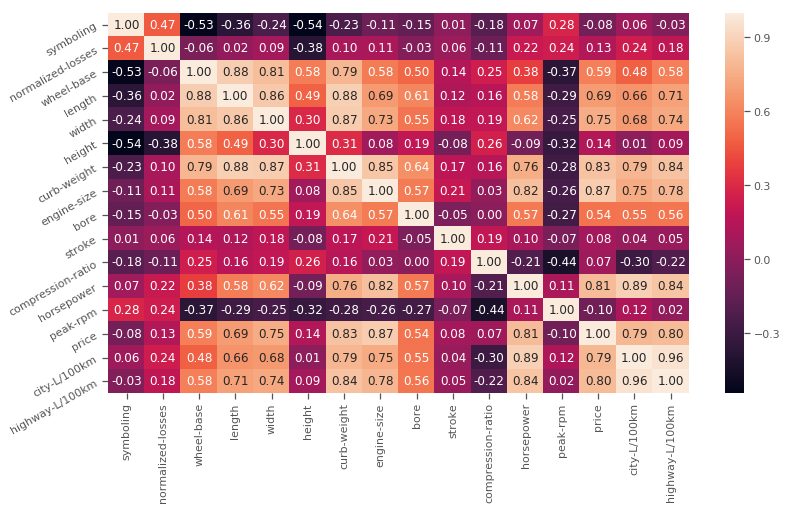

In [16]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

<a id='7.1'></a>
## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<b>P-value</b>: 
<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

<a id='8'></a>
## Symboling
- <b>Definition</b>: Symboling is a categorical variable that rates how risky the vehicle is: -3 -> really risky | 3 -> not risky.
- <b>Analysis</b>: We can see that most of the vehicles are on the range of 0-1. 
- <b>Outliers</b>: There are several outliers when comparing symboling to price.
- <b>Correlation</b>: The correlation between price and symboling is almost ZERO. 
- <b>Assumption</b>: this variable does not impact the car prices. Thus, it should be removed from our model.

 0    65
 1    52
 2    32
 3    26
-1    22
-2     3
Name: symboling, dtype: int64


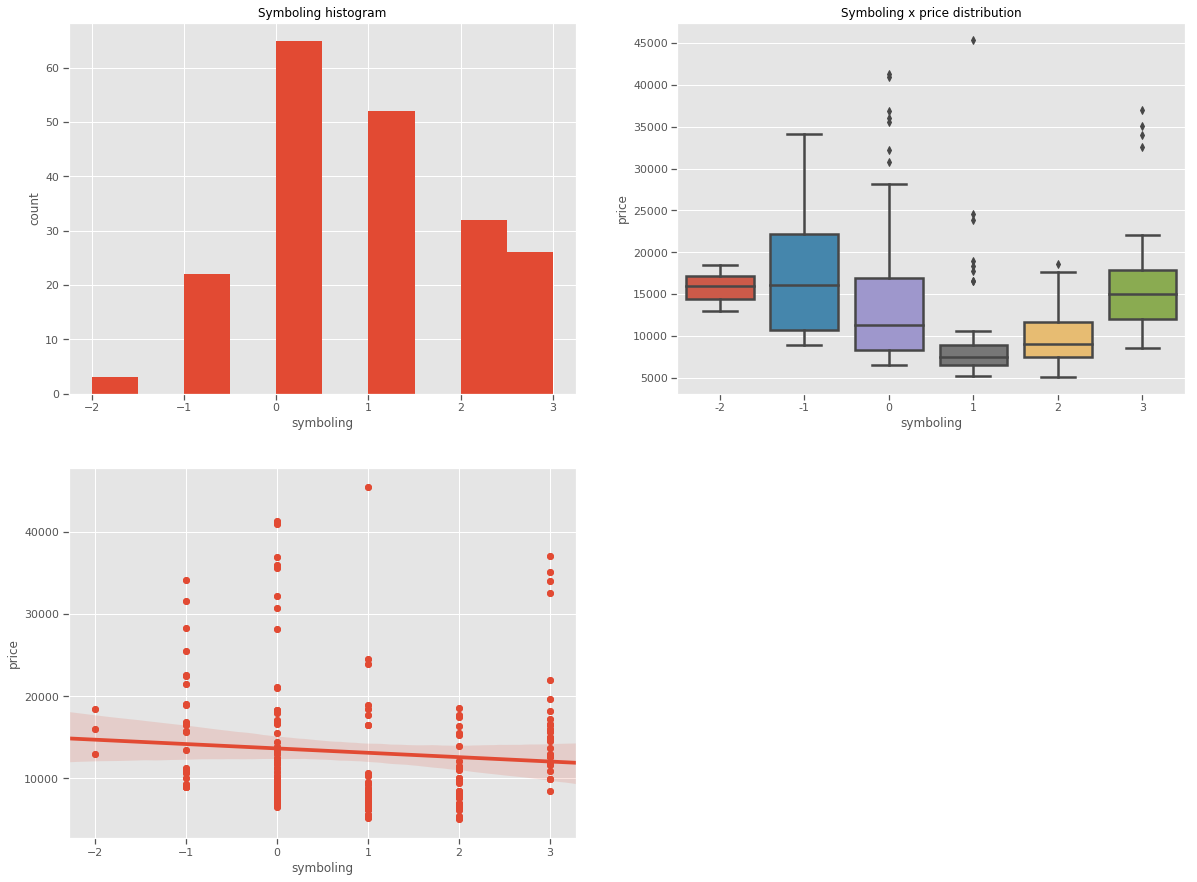

In [17]:
print(df['symboling'].value_counts())

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1).hist(df['symboling'])
# set x/y labels and plot title
plt.xlabel("symboling")
plt.ylabel("count")
plt.title("Symboling histogram")

plt.subplot(2, 2, 2)
# set x/y labels and plot title
plt.xlabel("symboling")
plt.ylabel("price")
plt.title("Symboling x price distribution")
sns.boxplot(x="symboling", y="price", data=df)

plt.subplot(2, 2, 3).scatter(df['symboling'],df['price'])
sns.regplot(x="symboling", y="price", data=df)
df[['symboling','price']].corr()

df.drop("symboling", axis = 1, inplace=True)

<a id='9'></a>
## normalized-losses
- <b>Definition</b>: It is the relative average loss payment per insured vehicle year. This value is nor- malized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc.), and represents the average loss per car per year.
- <b>Analysis</b>:We can see that most of the values are concentrated close to the mean (122). Price is spreadout along different types of normalized-lossed which probably means that this feature doesnt impact on price.
- <b>Outliers</b>: The data is spread when compared to price proving the weak realationship.
- <b>Correlation</b>: The correlation between price and normalized-losses is weak (0.13). 
- <b>Assumption</b>: this variable does not impact the car prices. Thus, it should be removed from our model.

51


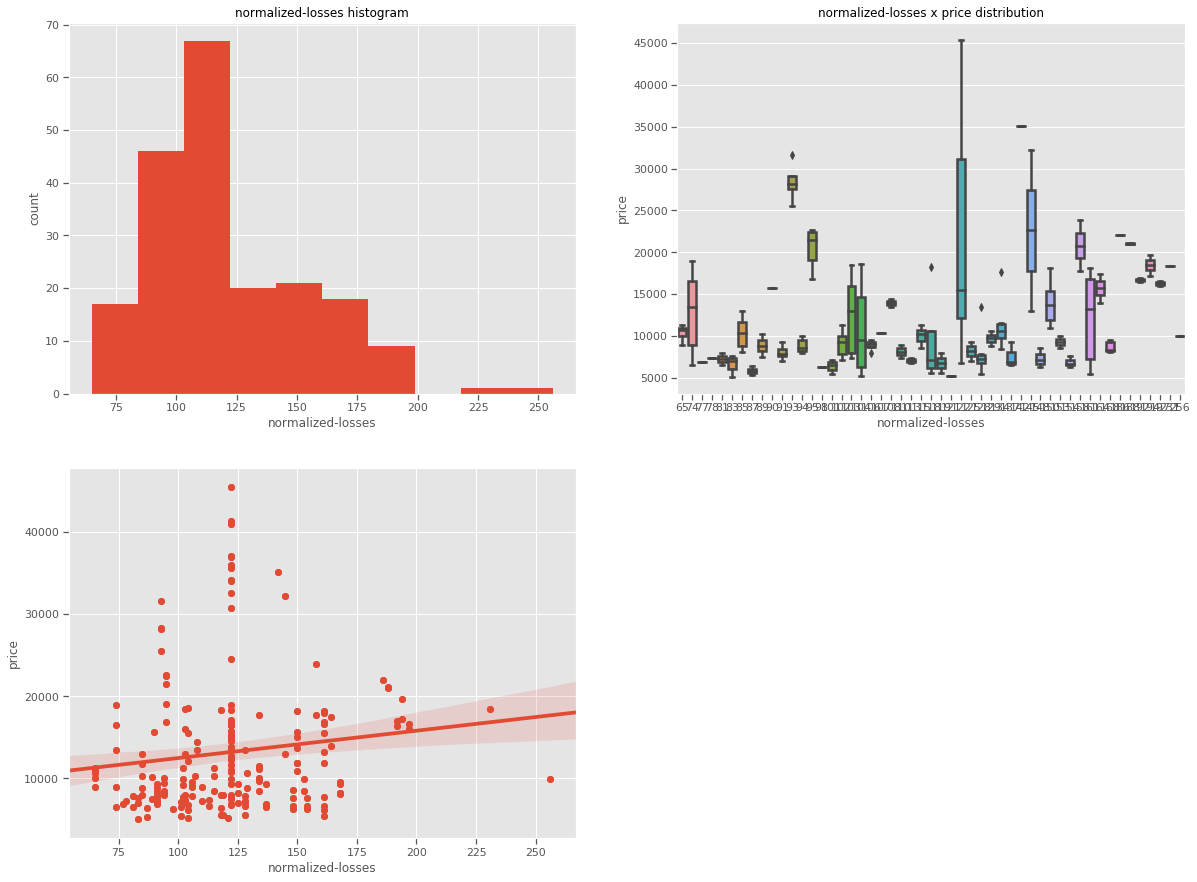

In [18]:
print(df['normalized-losses'].nunique())

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1).hist(df['normalized-losses'])
# set x/y labels and plot title
plt.xlabel("normalized-losses")
plt.ylabel("count")
plt.title("normalized-losses histogram")

plt.subplot(2, 2, 2)
# set x/y labels and plot title
plt.xlabel("normalized-losses")
plt.ylabel("price")
plt.title("normalized-losses x price distribution")
sns.boxplot(x="normalized-losses", y="price", data=df)

plt.subplot(2, 2, 3).scatter(df['normalized-losses'],df['price'])
sns.regplot(x="normalized-losses", y="price", data=df)
df[['normalized-losses','price']].corr()

df.drop("normalized-losses", axis = 1, inplace=True)

<a id='10'></a>
## make
- <b>Definition</b>: A car's make is the brand of the vehicle, while the model refers to the name of a car product and sometimes a range of products. For example, Toyota is a car make and Camry is a car model. The make, model, model year, body style and trim level all have implications on the cost of a vehicle and its insurance rates.
- <b>Analysis</b> 
- The most expensive car is manufacture by Mercedes benz and the least expensive is Chevrolet
- More expensive cars are BMW, Jaquar, Mercedes benz and Porsche (<$20000)

- Cheapest Cars are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru (>$10000)
- The other 11 'makes' are in the midrange between 10000 and 20000 which has the highest number of cars.
    
- <b>Assumption</b>: this variable does not impact the car prices. The same make can manufacture different car models varying the price. We should be able to analize models for the same make but this is not the purpose of this notebook.

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       2
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64


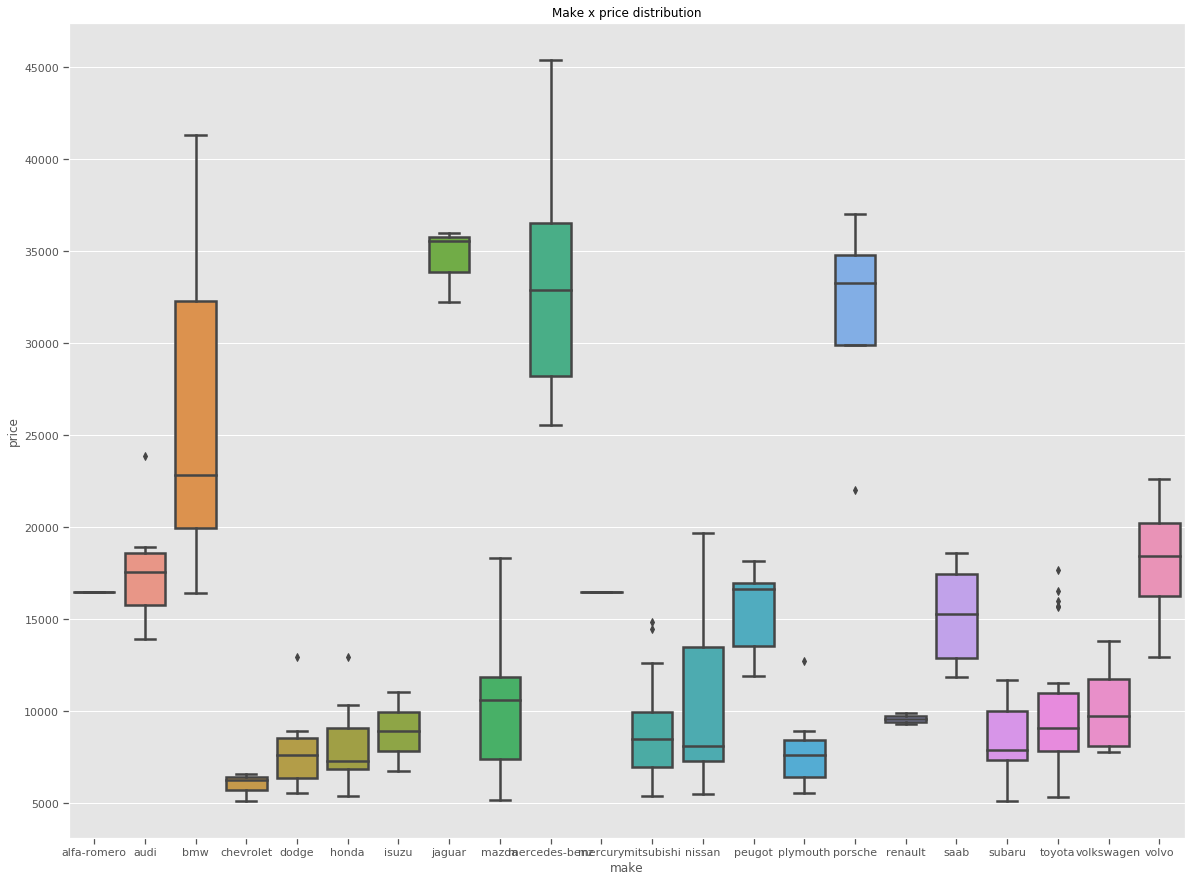

In [19]:
print(df['make'].value_counts())

plt.figure(figsize=(20, 15))


# set x/y labels and plot title
plt.xlabel("make")
plt.ylabel("price")
plt.title("Make x price distribution")
sns.boxplot(x="make", y="price", data=df)

'''df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('make')'''

df.drop("make", axis = 1, inplace=True)

<a id='11'></a>
## fuel-type
- <b>Definition</b>: Obviously the type of fuel.
- <b>Analysis</b>: We have two different types of fuel. We are going to classify Gas=1 and Diesel=0
- <b>Outliers</b>: Some cars runned by gas are really expensive and it would interfere in our model so we are going to remove them.
- <b>Correlation</b>: The correlation between price and symboling is -0.11. 
- <b>Assumption</b>: this variable does not impact the car prices. Thus, it should be removed from our model.

gas       180
diesel     20
Name: fuel-type, dtype: int64


'df[\'fuel-type\'].value_counts().plot(kind=\'bar\',color=\'purple\')\nplt.title("Fuel type frequence diagram")\nplt.ylabel(\'Number of vehicles\')\nplt.xlabel(\'Fuel type\')'

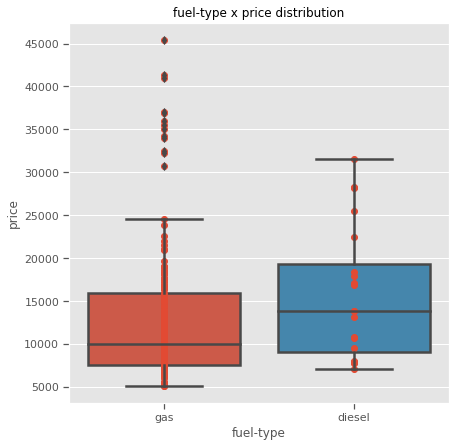

In [20]:
print(df['fuel-type'].value_counts())

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1).scatter(df['fuel-type'],df['price'])
# set x/y labels and plot title
plt.xlabel("fuel-type")
plt.ylabel("price")
plt.title("fuel-type x price distribution")
sns.boxplot(x="fuel-type", y="price", data=df)

'''df['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')'''

In [21]:
df['fuel-type'] = df['fuel-type'].map( {'gas': 1, 'diesel': 0} ).astype(int)
print(df[["fuel-type", "price"]].corr())

df.drop("fuel-type", axis = 1, inplace=True)

           fuel-type     price
fuel-type   1.000000 -0.110417
price      -0.110417  1.000000


<a id='12'></a>
## aspiration
- <b>Definition</b>: A naturally aspirated engine is an internal combustion engine in which air intake depends solely on atmospheric pressure and which does not rely on forced induction through a turbocharger or a supercharger. Many sports cars specifically use naturally aspirated engines due to their lack of a turbo lag.
- <b>Analysis</b>: We have two different types of engine. We are going to classify std=1 and turbo=0 
- <b>Outliers</b>: There are several outliers when comparing engine to price.
- <b>Correlation</b>: The correlation between price and engine is almost ZERO. 
- <b>Assumption</b>: this variable does not impact the car prices. Thus, it should be removed from our model.

std      164
turbo     36
Name: aspiration, dtype: int64


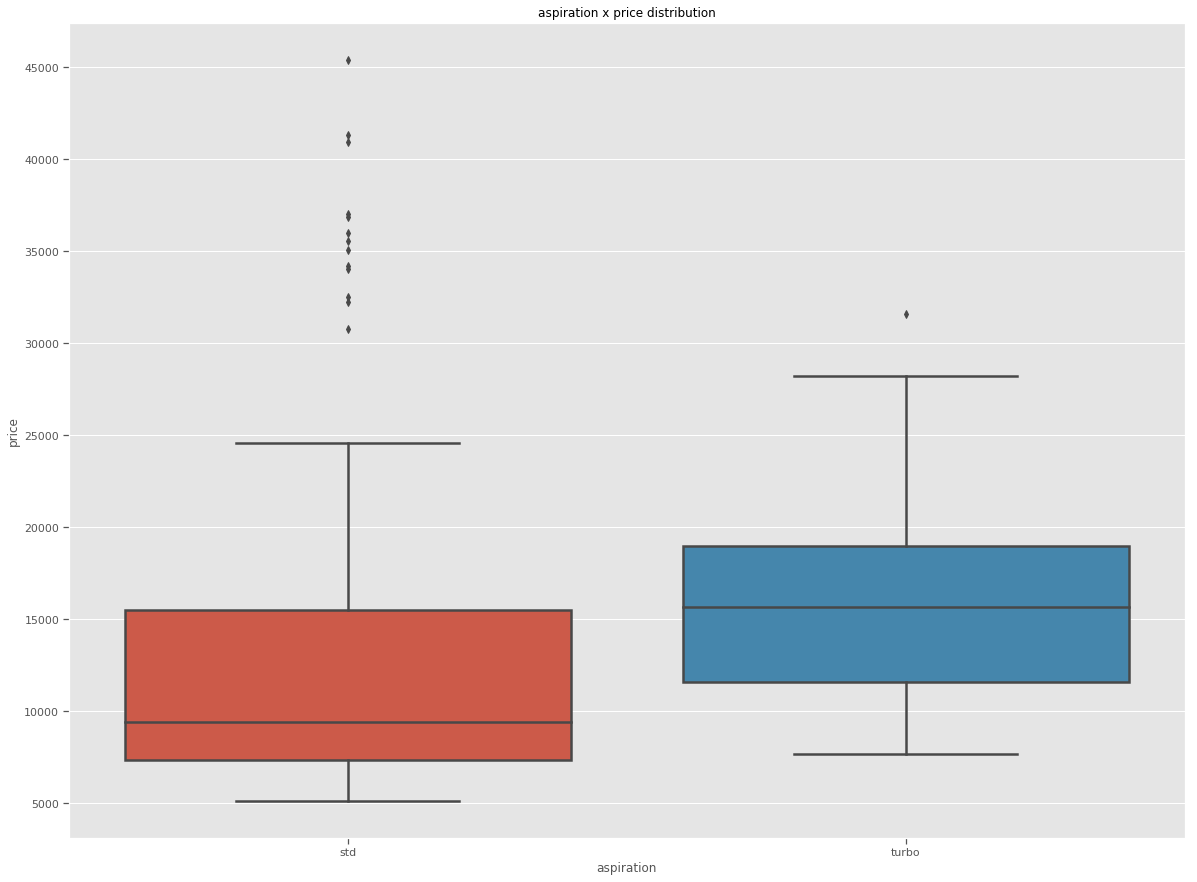

In [22]:
print(df['aspiration'].value_counts())

plt.figure(figsize=(20, 15))

# set x/y labels and plot title
plt.xlabel("aspiration")
plt.ylabel("price")
plt.title("aspiration x price distribution")
sns.boxplot(x="aspiration", y="price", data=df)


In [23]:
df['aspiration'] = df['aspiration'].map( {'std': 1, 'turbo': 0} ).astype(int)
df[["aspiration", "price"]].corr()

df.drop("aspiration", axis = 1, inplace=True)

<a id='13'></a>
## num-of-doors
- <b>Definition</b>:Obviously the number of doors on the car.
- <b>Analysis</b>: We have two different types of engine. We are going to classify two doors=1 and four doors=0 
- <b>Outliers</b>: There are several outliers when comparing engine to price.
- <b>Correlation</b>: The correlation between price and engine is almost ZERO. 
- <b>Assumption</b>: this variable does not impact the car prices. Thus, it should be removed from our model.

four    115
two      85
Name: num-of-doors, dtype: int64


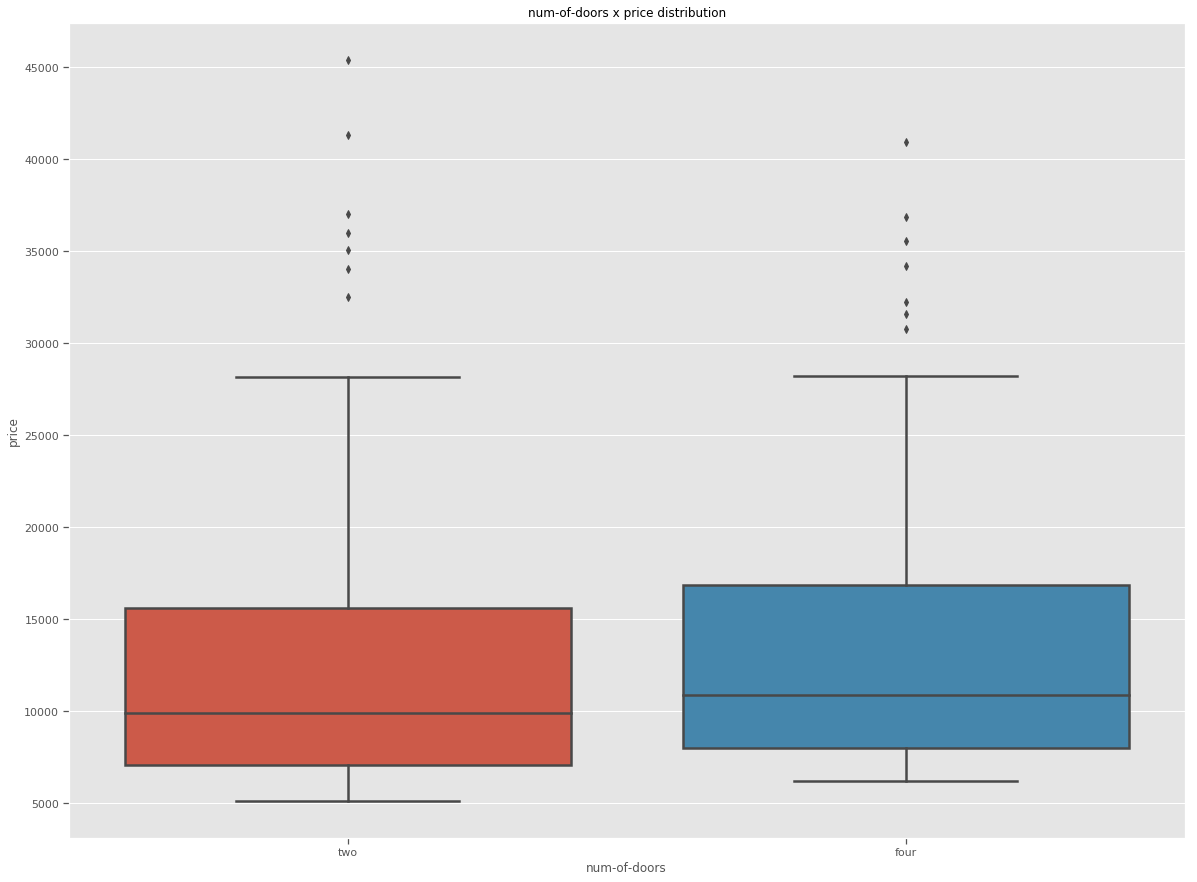

In [24]:
print(df['num-of-doors'].value_counts())

plt.figure(figsize=(20, 15))

# set x/y labels and plot title
plt.xlabel("num-of-doors")
plt.ylabel("price")
plt.title("num-of-doors x price distribution")
sns.boxplot(x="num-of-doors", y="price", data=df)


In [25]:
df['num-of-doors'] = df['num-of-doors'].map( {'two': 1, 'four': 0} ).astype(int)
df[["num-of-doors", "price"]].corr()

df.drop("num-of-doors", axis = 1, inplace=True)

<a id='14'></a>
## body-style
- <b>Definition</b>: The body style of a vehicle refers to the shape and model of a particular automobile make. Contemporary passenger-car body styles generally include two-door coupes, four-door sedans, hatchbacks, station wagons, sports cars, minivans, sport utility vehicles and convertibles.
- <b>Analysis</b>: We have five different types of engine. We are going to classify each of the variables as 1 and 0.
- <b>Outliers</b>: There are several outliers when comparing body-style to price. We won't take care of them for this exercise.
- <b>Correlation</b>: The correlation between price and the different styles is not significant. 
- <b>Assumption</b>: These variable won't impact the car prices. Thus, they should be removed from our model.

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: body-style, dtype: int64


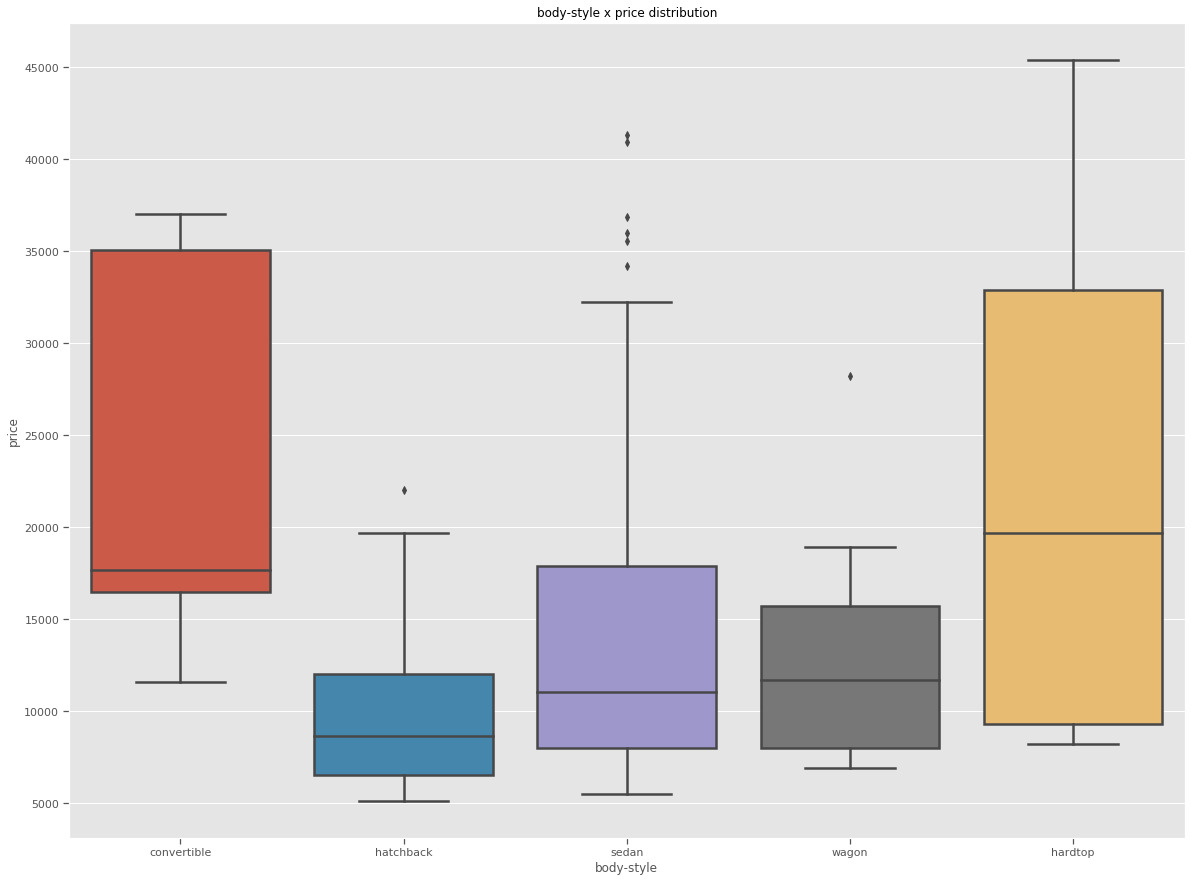

In [26]:
print(df['body-style'].value_counts())

plt.figure(figsize=(20, 15))

# set x/y labels and plot title
plt.xlabel("body-style")
plt.ylabel("price")
plt.title("body-style x price distribution")
sns.boxplot(x="body-style", y="price", data=df)


In [27]:
dummy_variable_b_style = pd.get_dummies(df["body-style"])
df = pd.concat([df, dummy_variable_b_style], axis=1)
df.drop("body-style", axis = 1, inplace=True)
dummy_variable_b_style.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [28]:
print(df[['convertible','hardtop','hatchback','sedan','wagon','price']].corr())

df.drop(['convertible','hardtop','hatchback','sedan','wagon'], axis = 1, inplace=True)

             convertible   hardtop  hatchback     sedan     wagon     price
convertible     1.000000 -0.032686  -0.114930 -0.150792 -0.060523  0.208827
hardtop        -0.032686  1.000000  -0.146508 -0.192223 -0.077152  0.231242
hatchback      -0.114930 -0.146508   1.000000 -0.675894 -0.271280 -0.293367
sedan          -0.150792 -0.192223  -0.675894  1.000000 -0.355928  0.148602
wagon          -0.060523 -0.077152  -0.271280 -0.355928  1.000000 -0.039653
price           0.208827  0.231242  -0.293367  0.148602 -0.039653  1.000000


<a id='15'></a>
## drive-wheels
- <b>Definition</b>:Two-wheel drive (2WD) describes vehicles in which, in theory, two wheels receive power from the engine at the same time The power can go on the front wheels or rear (fwd / rwd). Usually the two wheels are on the same axle in the drivetrain. Four-wheel drive, also called 4×4 ("four by four") or 4WD, refers to a two-axled vehicle drivetrain capable of providing torque to all of its wheels simultaneously.
- <b>Analysis</b>: We have three different types of engine. We are going to classify them as 0-1 with the dummy methods again.
- <b>Outliers</b>: There are several outliers when comparing drive-wheels to price we will elimitate all at once before starting our ML model.
- <b>Correlation</b>: The correlation between price and engine is close to 1 so it will be important to our model. From the boxplot we can see that the price varies a lot according to driving wheels. 
- <b>Assumption</b>: Driving Wheels will impact the car prices. It will be considered in our predictive model.

fwd    118
rwd     74
4wd      8
Name: drive-wheels, dtype: int64


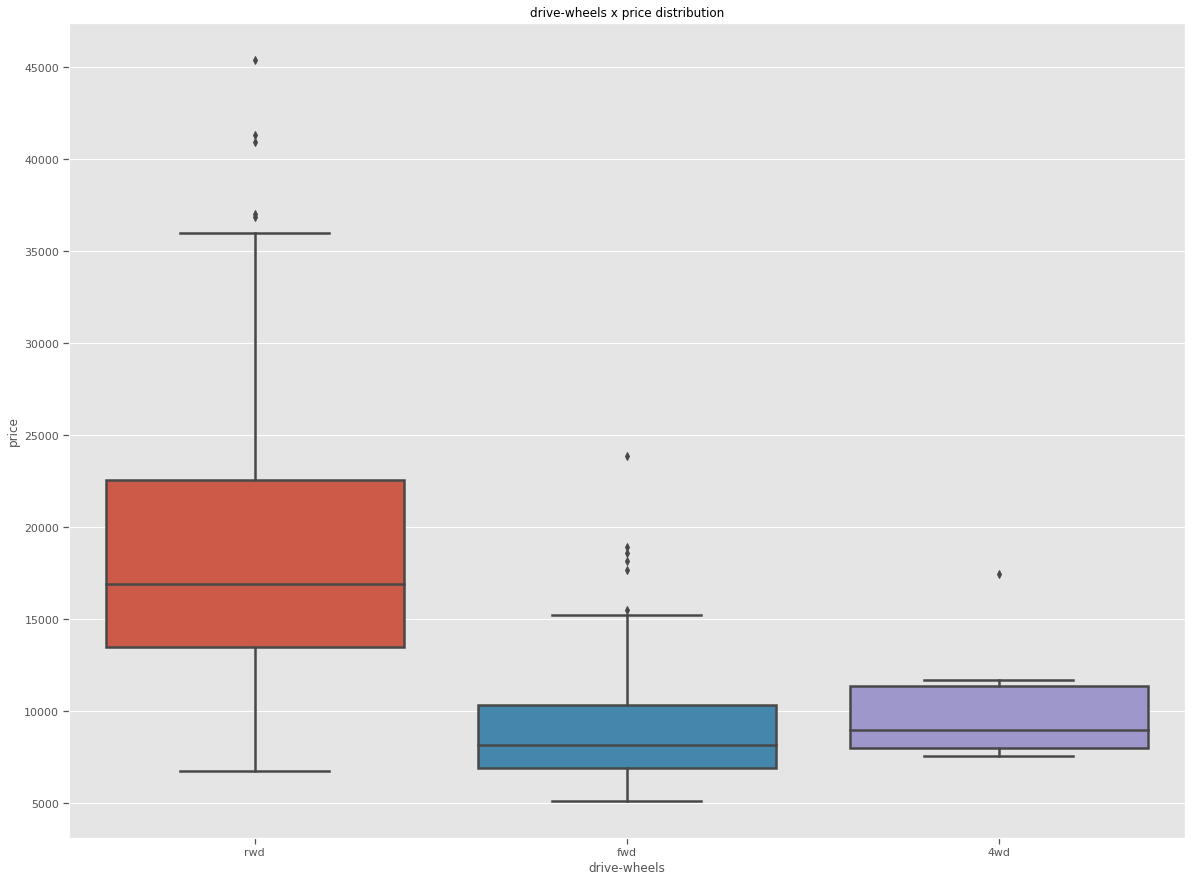

In [29]:
print(df['drive-wheels'].value_counts())

plt.figure(figsize=(20, 15))

# set x/y labels and plot title
plt.xlabel('drive-wheels')
plt.ylabel("price")
plt.title('drive-wheels x price distribution')
sns.boxplot(x='drive-wheels', y="price", data=df)

In [30]:
dummy_variable_d_wheels = pd.get_dummies(df["drive-wheels"])
df = pd.concat([df, dummy_variable_d_wheels], axis=1)
df = df.rename(columns={"fwd": "d_whe_fwd", "rwd": "d_whe_rwd","4wd": "d_whe_4wd"})
df.drop('drive-wheels', axis = 1, inplace=True)
df[['d_whe_fwd','d_whe_rwd','d_whe_4wd','price']].corr()

,d_whe_fwd,d_whe_rwd,d_whe_4wd,price
d_whe_fwd,1.000000,-0.919316,-0.244866,-0.597893
d_whe_rwd,-0.919316,1.000000,-0.156432,0.639982
d_whe_4wd,-0.244866,-0.156432,1.000000,-0.076150
price,-0.597893,0.639982,-0.076150,1.000000


<a id='16'></a>
## engine-location
- <b>Definition</b>:The front-engine, rear-wheel drive layout (abbreviated as FR layout) is one where the engine is located at the front of the vehicle and driven wheels are located at the rear.
- <b>Analysis</b>: The majority of the dataset is composed by front-engine and we can see on the boxplot how different the price is from Front to Rear engine.
- <b>Outliers</b>: There are several outliers when comparing engine to price we are going to remove them at once on the end of the analysis
- <b>Correlation</b>: The correlation between price and engine is strong.
- <b>Assumption</b>: Engine-location will impact the car prices. It will be considered in our predictive model.

front    197
rear       3
Name: engine-location, dtype: int64


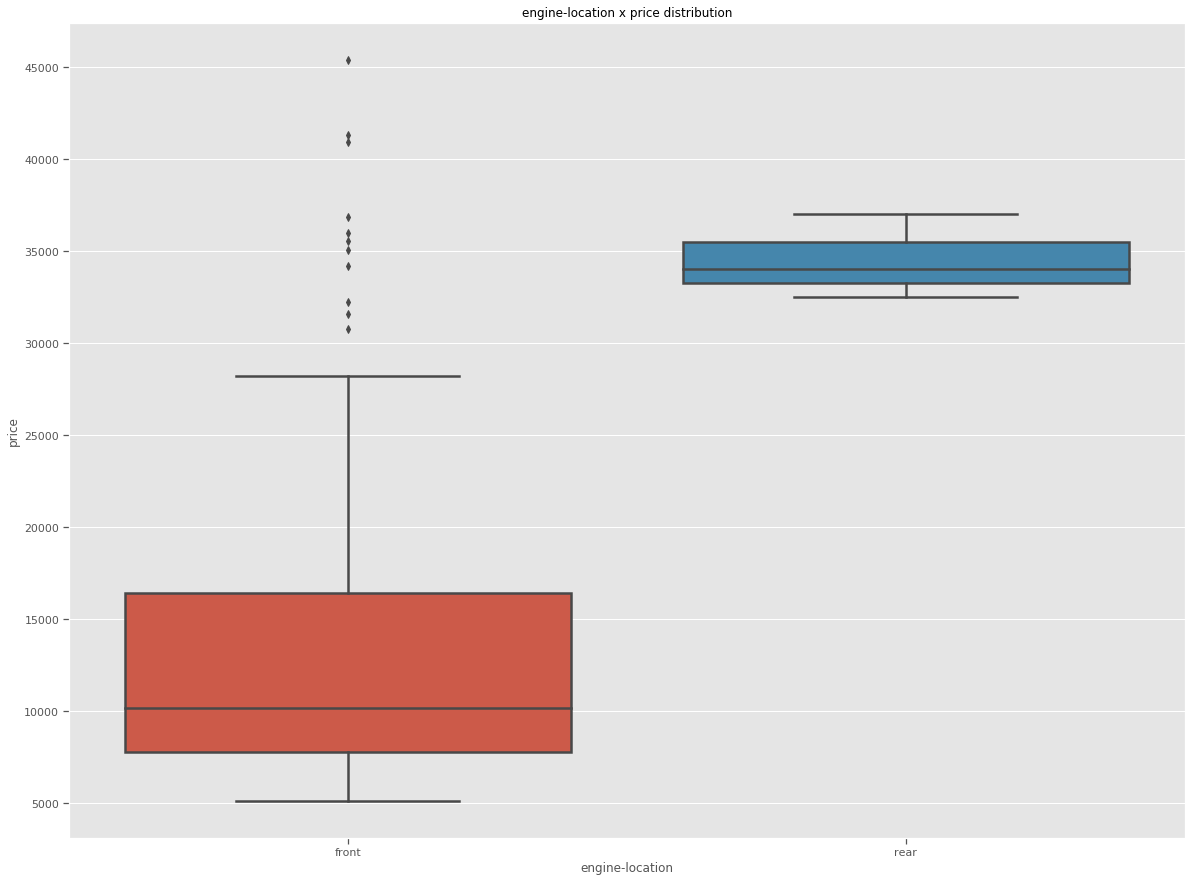

In [31]:
print(df['engine-location'].value_counts())

plt.figure(figsize=(20, 15))

# set x/y labels and plot title
plt.xlabel("engine-location")
plt.ylabel("price")
plt.title("engine-location x price distribution")
sns.boxplot(x="engine-location", y="price", data=df)


In [32]:
dummy_variable_e_loc = pd.get_dummies(df["engine-location"])
df = pd.concat([df, dummy_variable_e_loc], axis=1)
df = df.rename(columns={"front": "e_loc_front", "rear": "e_loc_rear"})
df.drop('engine-location', axis = 1, inplace=True)
df[['e_loc_front','e_loc_rear','price']].corr()

,e_loc_front,e_loc_rear,price
e_loc_front,1.000000,-1.000000,-0.331098
e_loc_rear,-1.000000,1.000000,0.331098
price,-0.331098,0.331098,1.000000


<a id='17'></a>
## Vehicles' Dimension
The following parameters are related to the size of the vehicles:
- wheel-base: is the distance between the centers of the front and rear wheels.
- length x width x height (Volume of vehicle)
- curb-weight: is the total mass of a vehicle with standard equipment and all necessary operating consumables such as motor oil, transmission oil, coolant, air conditioning refrigerant, and sometimes a full tank of fuel, while not loaded with either passengers or cargo.

Below we can see the correlation between these characteristics and note that they are all correlated. We are going to use the feature curb-weight only as it represents the best correlation with price and also represents all the other measurements (strong correlation with all parameters)

In [33]:
#creating feature volume
df['volume'] = df['length']*df['width']*df['height']

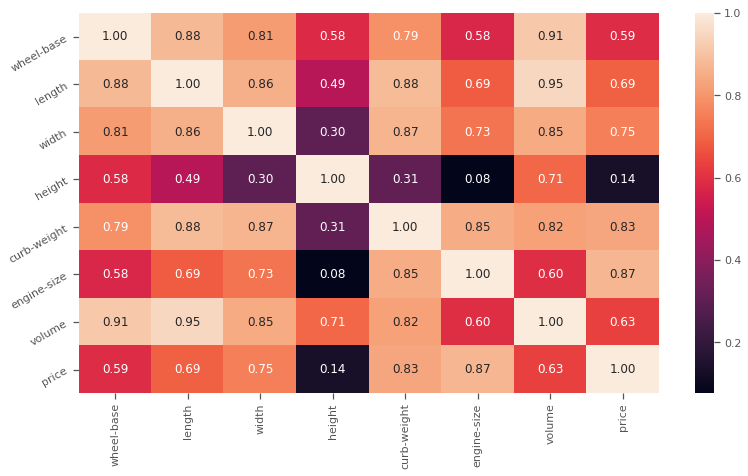

In [34]:
corr_dim = df[['wheel-base','length','width','height','curb-weight','engine-size','volume','price']].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr_dim, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

df.drop(['wheel-base','length','width','height','volume','engine-size'], axis = 1, inplace=True)

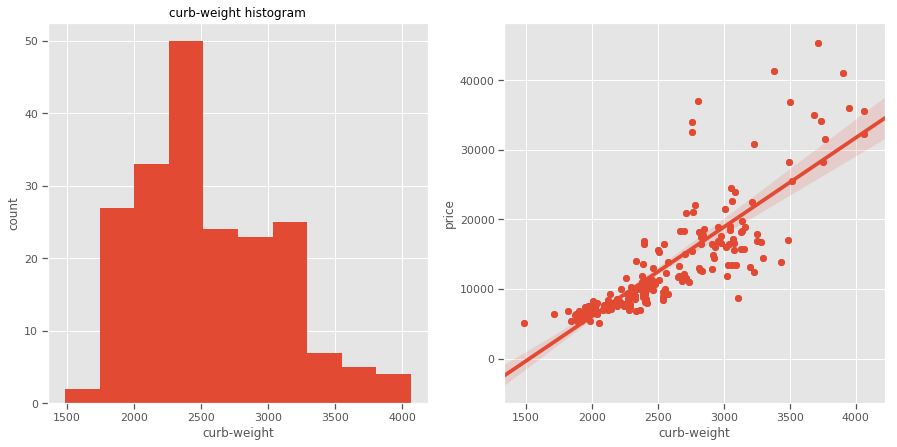

In [35]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1).hist(df['curb-weight'])
# set x/y labels and plot title
plt.xlabel("curb-weight")
plt.ylabel("count")
plt.title("curb-weight histogram")

plt.subplot(1, 2, 2).scatter(df['curb-weight'],df['price'])
sns.regplot(x="curb-weight", y="price", data=df)

<a id='18'></a>
## engine-type 
- <b>Definition</b>:It is an engine in which combustion of fuel take place inside the engine. ... These engines are generally used in automobile industries, generation of electric power etc. Types of I.C. Engine. I.C. engine is widely used in automobile industries so it is also known as automobile engine.
- <b>Analysis</b>: The majority of the dataset is composed by ohc and we can see on the boxplot how different the price is from each other.
- <b>Outliers</b>: There are several outliers when comparing engine to price we are going to remove them at once on the end of the analysis
- <b>Correlation</b>: The correlation between price and the engine types is not significant. 
- <b>Assumption</b>: These variable won't impact the car prices. Thus, they should be removed from our model.

ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: engine-type, dtype: int64


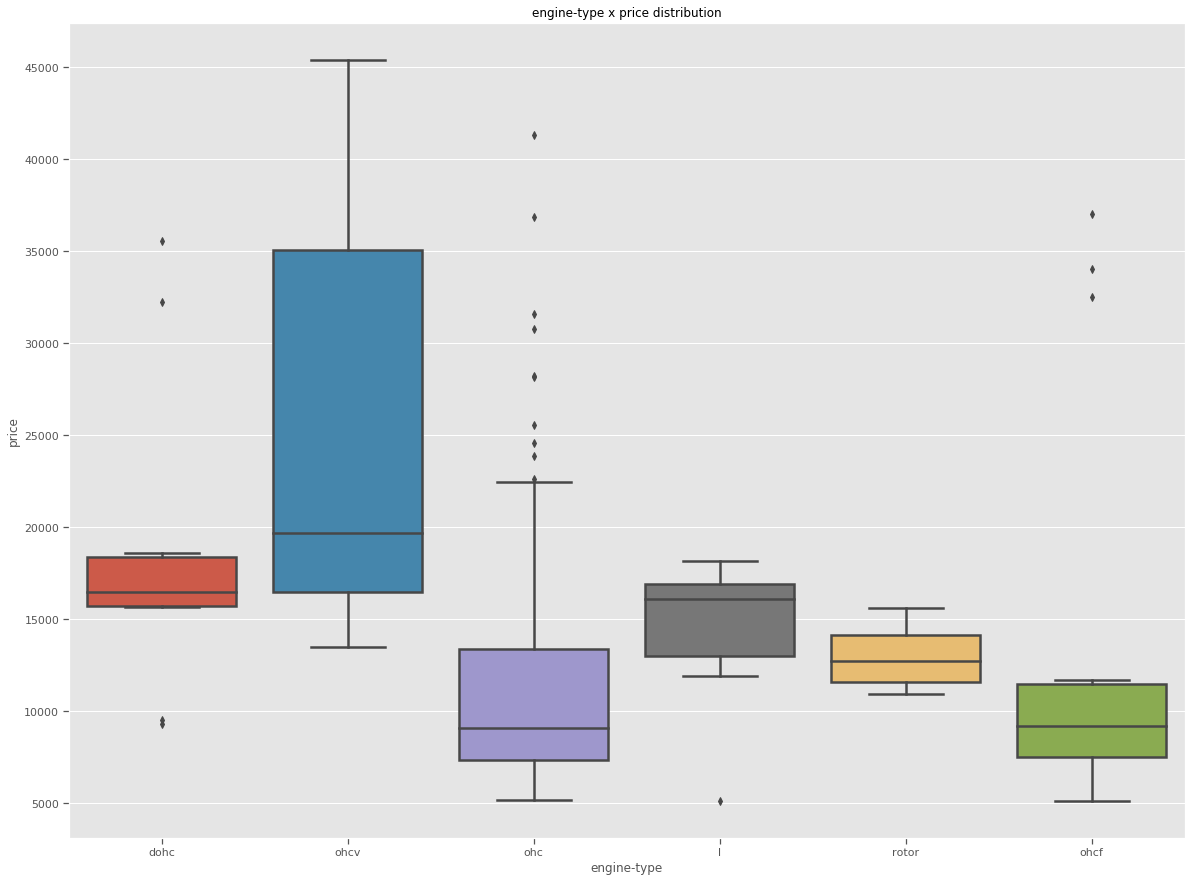

In [36]:
print(df['engine-type'].value_counts())

plt.figure(figsize=(20, 15))

# set x/y labels and plot title
plt.xlabel('engine-type')
plt.ylabel("price")
plt.title('engine-type x price distribution')
sns.boxplot(x='engine-type', y="price", data=df)


In [37]:
dummy_variable_e_type = pd.get_dummies(df["engine-type"])
df = pd.concat([df, dummy_variable_e_type], axis=1)
print(df[['ohc','ohcf','ohcv','l','dohc','rotor','price']].corr())

df.drop(['ohc','ohcf','ohcv','l','dohc','rotor','engine-type'], axis = 1, inplace=True)

            ohc      ohcf      ohcv         l      dohc     rotor     price
ohc    1.000000 -0.462341 -0.428108 -0.410218 -0.391713 -0.231955 -0.334733
ohcf  -0.462341  1.000000 -0.075078 -0.071940 -0.068695 -0.040678  0.019094
ohcv  -0.428108 -0.075078  1.000000 -0.066614 -0.063609 -0.037666  0.394572
l     -0.410218 -0.071940 -0.066614  1.000000 -0.060950 -0.036092  0.045204
dohc  -0.391713 -0.068695 -0.063609 -0.060950  1.000000 -0.034464  0.161829
rotor -0.231955 -0.040678 -0.037666 -0.036092 -0.034464  1.000000 -0.003338
price -0.334733  0.019094  0.394572  0.045204  0.161829 -0.003338  1.000000


<a id='19'></a>
## num-of-cylinders
- <b>Definition</b>:A cylinder is the central working part of a reciprocating engine or pump, the space in which a piston travels. Multiple cylinders are commonly arranged side by side in a bank, or engine block, which is typically cast from aluminum or cast iron before receiving precision machine work. 
- <b>Analysis</b>: Most of the cars on this dataset have only four cylinders. From the boxplot that the prices varies a lot when compared to the number of cylinders.
- <b>Correlation</b>: The correlation between price and number of cylinders varies according to the number of cylinders. We are going to join the rare type of cylinders in a single variable to use in our model. 
- <b>Assumption</b>: this variable will impact the car prices. 

four      156
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64


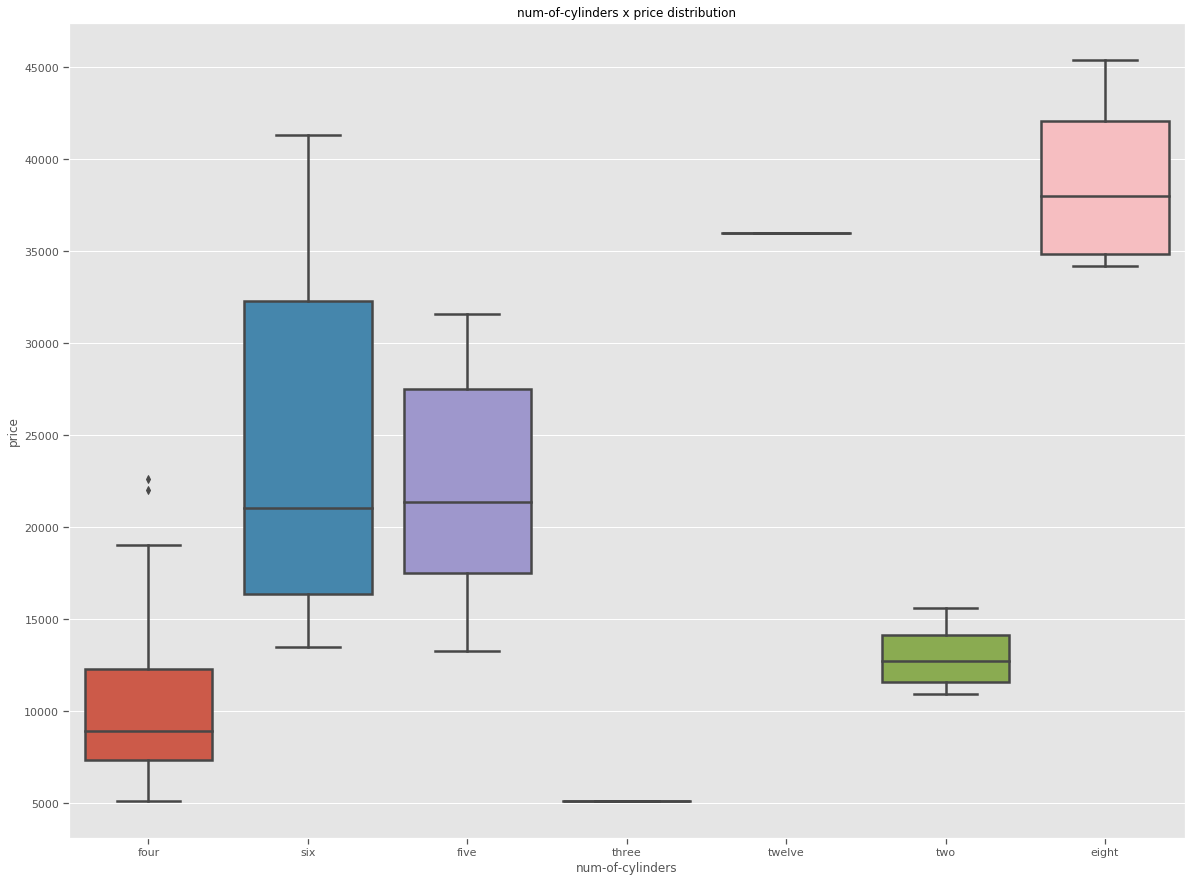

In [38]:
print(df['num-of-cylinders'].value_counts())

plt.figure(figsize=(20, 15))

# set x/y labels and plot title
plt.xlabel("num-of-cylinders")
plt.ylabel("price")
plt.title("num-of-cylinders x price distribution")
sns.boxplot(x="num-of-cylinders", y="price", data=df)


In [39]:
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['two','eight','three','twelve'],'rare')
dummy_variable_n_cyl = pd.get_dummies(df["num-of-cylinders"])
df = pd.concat([df, dummy_variable_n_cyl], axis=1)
df = df.rename(columns={"four": "n_cyl_4", "six": "n_cyl_6","five": "n_cyl_5","rare": "n_cyl_rare"})
df[['n_cyl_4','n_cyl_6','n_cyl_5','n_cyl_rare','price']].corr()

,n_cyl_4,n_cyl_6,n_cyl_5,n_cyl_rare,price
n_cyl_4,1.000000,-0.695321,-0.431976,-0.431976,-0.692552
n_cyl_6,-0.695321,1.000000,-0.084717,-0.084717,0.486329
n_cyl_5,-0.431976,-0.084717,1.000000,-0.052632,0.254094
n_cyl_rare,-0.431976,-0.084717,-0.052632,1.000000,0.337104
price,-0.692552,0.486329,0.254094,0.337104,1.000000


In [40]:
df.drop(['num-of-cylinders'], axis = 1, inplace=True)

<a id='20'></a>
## fuel-system
- <b>Definition</b>:The fuel injection types used in newer cars include four basic types:
- Single-point or throttle body injection.
- Port or multipoint fuel injection.
- Sequential fuel injection.
- Direct injection.


- <b>Analysis</b>: We have eight different types of fuel injection system. We are going to classify each of the variables as 1 and 0.
- <b>Outliers</b>: There are several outliers when comparing body-style to price. We won't take care of them for this exercise.
- <b>Correlation</b>: The correlation between price and the different styles is not significant. 
- <b>Assumption</b>: These variable won't impact the car prices. Thus, they should be removed from our model.

mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64


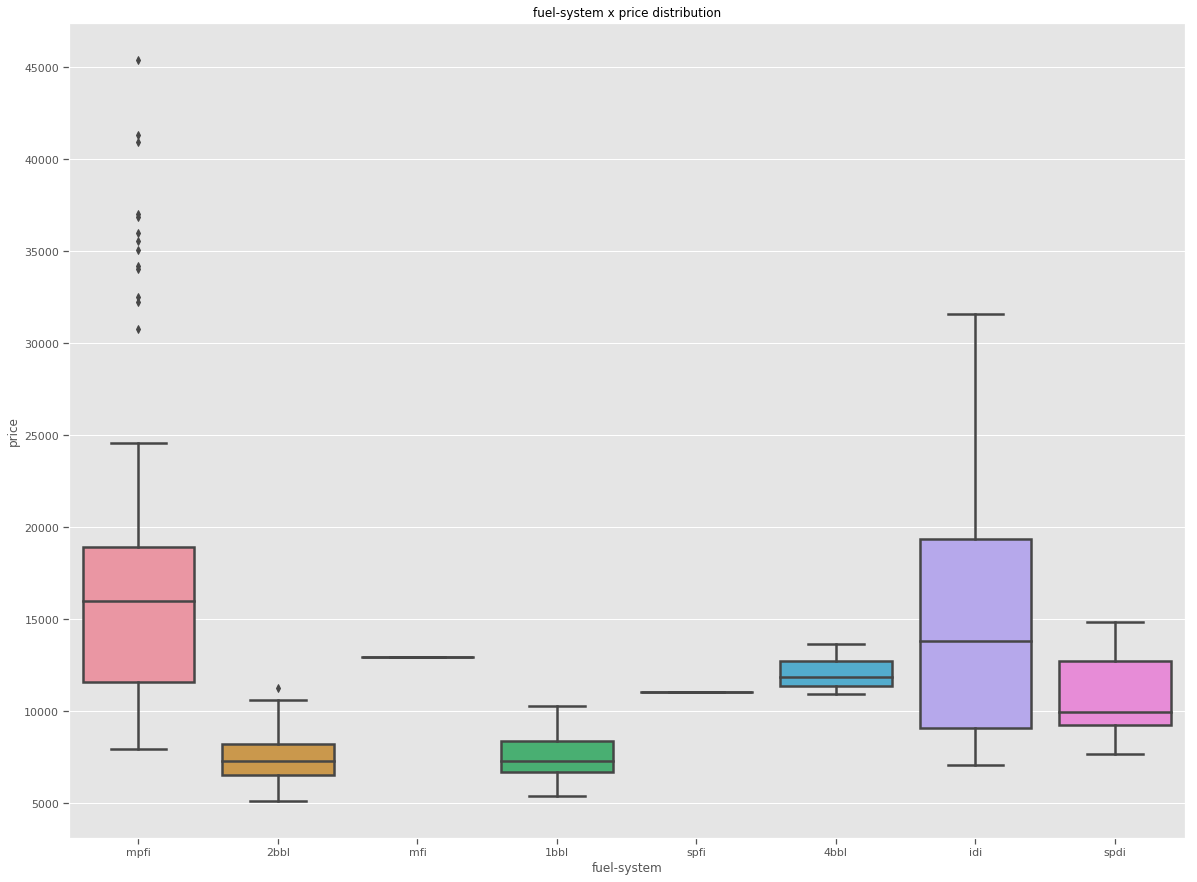

In [41]:
print(df['fuel-system'].value_counts())

plt.figure(figsize=(20, 15))

# set x/y labels and plot title
plt.xlabel("fuel-system")
plt.ylabel("price")
plt.title("fuel-system x price distribution")
sns.boxplot(x="fuel-system", y="price", data=df)


In [42]:
dummy_variable_f_sys = pd.get_dummies(df["fuel-system"])
df = pd.concat([df, dummy_variable_f_sys], axis=1)
df.drop("fuel-system", axis = 1, inplace=True)
df[['1bbl','2bbl','4bbl','idi','mfi','mpfi','spdi','spfi','price']].corr()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,price
1bbl,1.000000,-0.165495,-0.029771,-0.080416,-0.017102,-0.220431,-0.052368,-0.017102,-0.171522
2bbl,-0.165495,1.000000,-0.084654,-0.228665,-0.048629,-0.626799,-0.148910,-0.048629,-0.498285
4bbl,-0.029771,-0.084654,1.000000,-0.041135,-0.008748,-0.112755,-0.026787,-0.008748,-0.016471
idi,-0.080416,-0.228665,-0.041135,1.000000,-0.023629,-0.304569,-0.072357,-0.023629,0.110417
mfi,-0.017102,-0.048629,-0.008748,-0.023629,1.000000,-0.064771,-0.015388,-0.005025,-0.002156
mpfi,-0.220431,-0.626799,-0.112755,-0.304569,-0.064771,1.000000,-0.198341,-0.064771,0.511018
spdi,-0.052368,-0.148910,-0.026787,-0.072357,-0.015388,-0.198341,1.000000,-0.015388,-0.060509
spfi,-0.017102,-0.048629,-0.008748,-0.023629,-0.005025,-0.064771,-0.015388,1.000000,-0.019247
price,-0.171522,-0.498285,-0.016471,0.110417,-0.002156,0.511018,-0.060509,-0.019247,1.000000


In [43]:
df.drop(['1bbl','2bbl','4bbl','idi','mfi','mpfi','spdi','spfi'], axis = 1, inplace=True)

<a id='21'></a>
## bore
- <b>Definition</b>: In a piston engine, the bore (or cylinder bore) is the diameter of each cylinder.
- <b>Analysis</b>:The values for this feature are spreadout when compared to price. Most of the values are distributed between 3-3.8.
- <b>Correlation</b>: The correlation between price and normalized-losses is moderate (0.54). 
- <b>Assumption</b>: This Variable will impact on the predictive model.

39
The Pearson Correlation Coefficient is 0.5434325935555682  with a P-value of P =   9.207487524194635e-17


,bore,price
bore,1.000000,0.543433
price,0.543433,1.000000


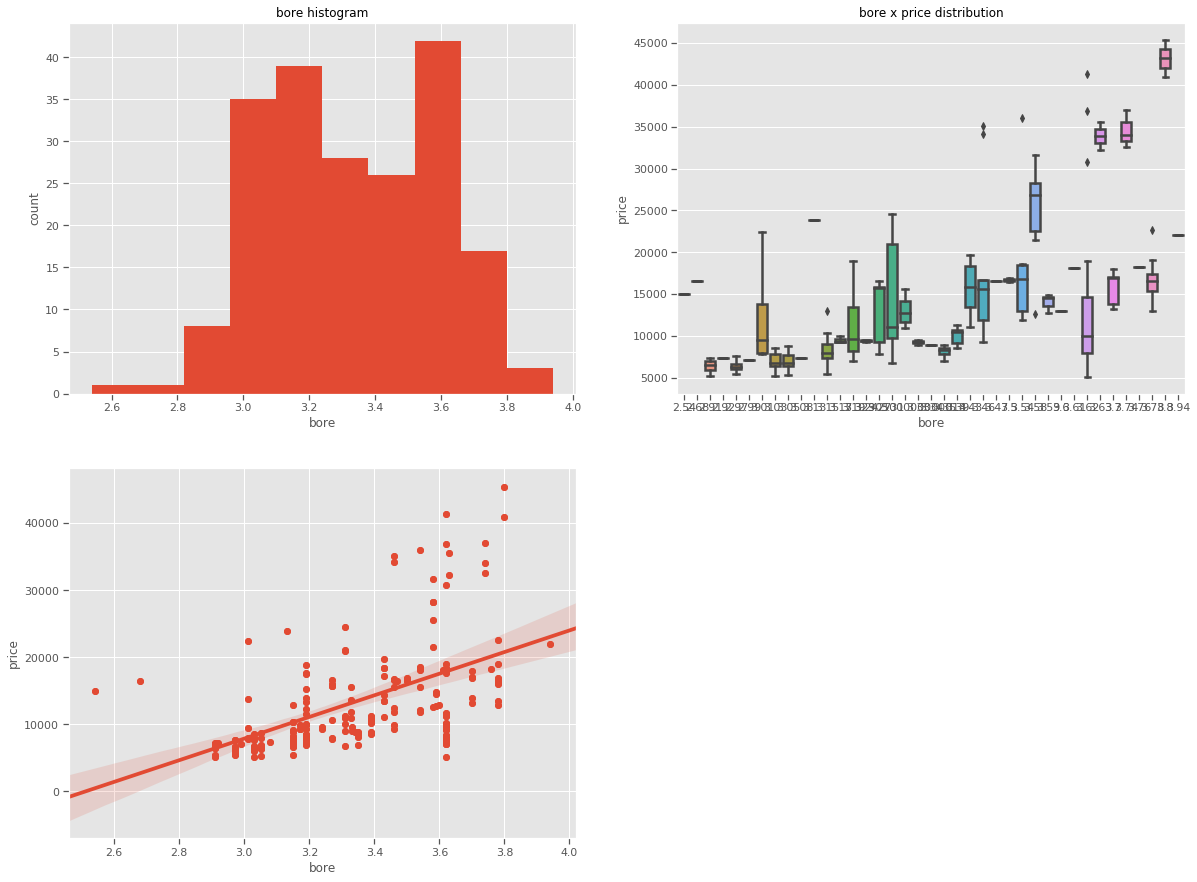

In [44]:
print(df['bore'].nunique())

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1).hist(df['bore'])
# set x/y labels and plot title
plt.xlabel("bore")
plt.ylabel("count")
plt.title("bore histogram")

plt.subplot(2, 2, 2)
# set x/y labels and plot title
plt.xlabel("bore")
plt.ylabel("price")
plt.title("bore x price distribution")
sns.boxplot(x="bore", y="price", data=df)

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

plt.subplot(2, 2, 3).scatter(df['bore'],df['price'])
sns.regplot(x="bore", y="price", data=df)
df[['bore','price']].corr()

<a id='22'></a>
## stroke
- <b>Definition</b>: The term stroke is applied to the movement of the piston in a locomotive cylinder.
- <b>Analysis</b>:The values for this feature are spreadout when compared to price. Most of the values are distributed between 3-3.5.
- <b>Correlation</b>: The correlation between price and normalized-losses is week (0.08). 
- <b>Assumption</b>: This Variable won't have impact on the predictive model.

37
The Pearson Correlation Coefficient is 0.08329789750121724  with a P-value of P =   0.24092998723898887


,stroke,price
stroke,1.000000,0.083298
price,0.083298,1.000000


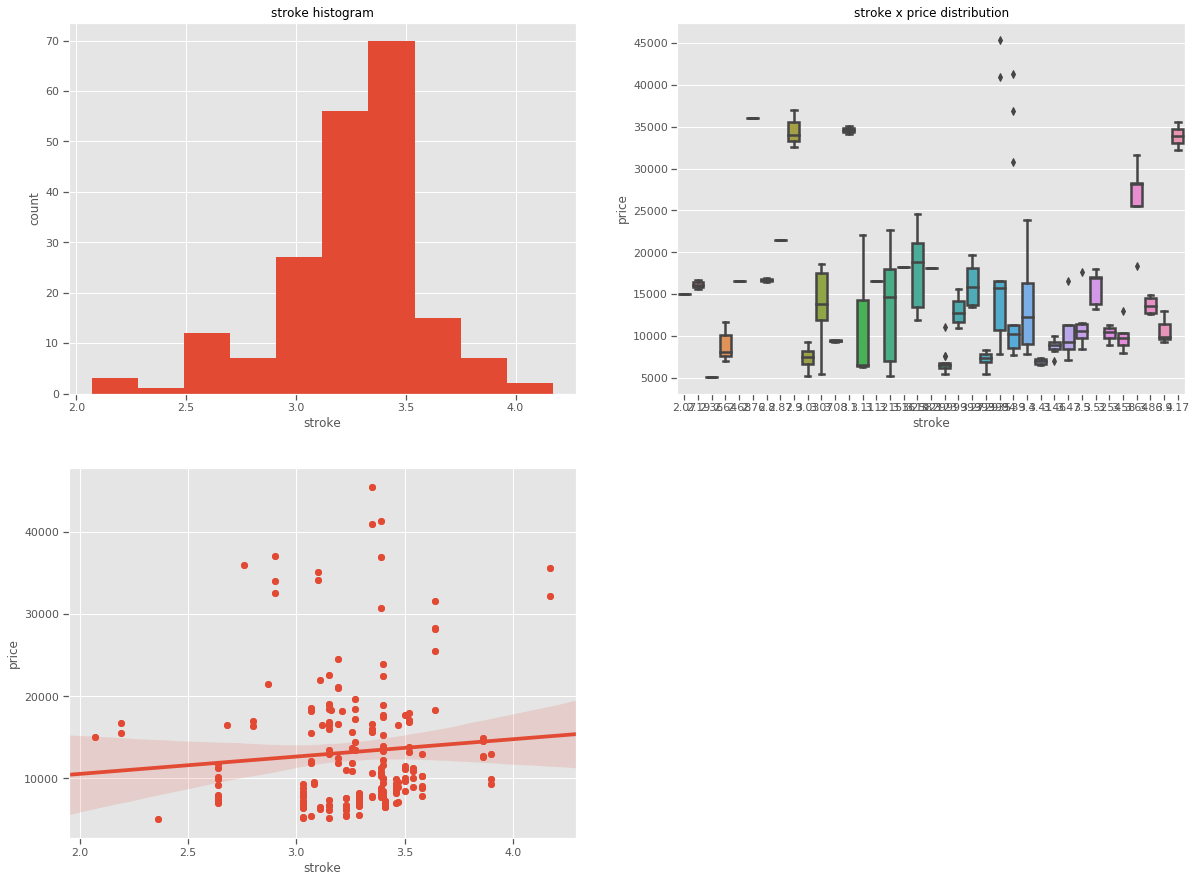

In [45]:
print(df['stroke'].nunique())

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1).hist(df['stroke'])
# set x/y labels and plot title
plt.xlabel("stroke")
plt.ylabel("count")
plt.title("stroke histogram")

plt.subplot(2, 2, 2)
# set x/y labels and plot title
plt.xlabel("stroke")
plt.ylabel("price")
plt.title("stroke x price distribution")
sns.boxplot(x="stroke", y="price", data=df)

pearson_coef, p_value = stats.pearsonr(df['stroke'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

plt.subplot(2, 2, 3).scatter(df['stroke'],df['price'])
sns.regplot(x="stroke", y="price", data=df)
df[['stroke','price']].corr()

In [46]:
df.drop('stroke', axis = 1, inplace=True)

<a id='23'></a>
## compression-ratio
- <b>Definition</b>: The compression ratio is the ratio of the volume of the cylinder and the combustion chamber when the piston is at the bottom, and the volume of the combustion chamber when the piston is at the top. Automotive engineers can improve fuel efficiency and fuel economy by designing engines with high compression ratios.
- <b>Analysis</b>:The values for this feature are spreadout when compared to price. Most of the values are distributed between 8-10.
- <b>Correlation</b>: The correlation between price and normalized-losses is week (0.07). 
- <b>Assumption</b>: This Variable won't have impact on the predictive model.

32
The Pearson Correlation Coefficient is 0.07117559170681716  with a P-value of P =   0.31656752744423744


,compression-ratio,price
compression-ratio,1.000000,0.071176
price,0.071176,1.000000


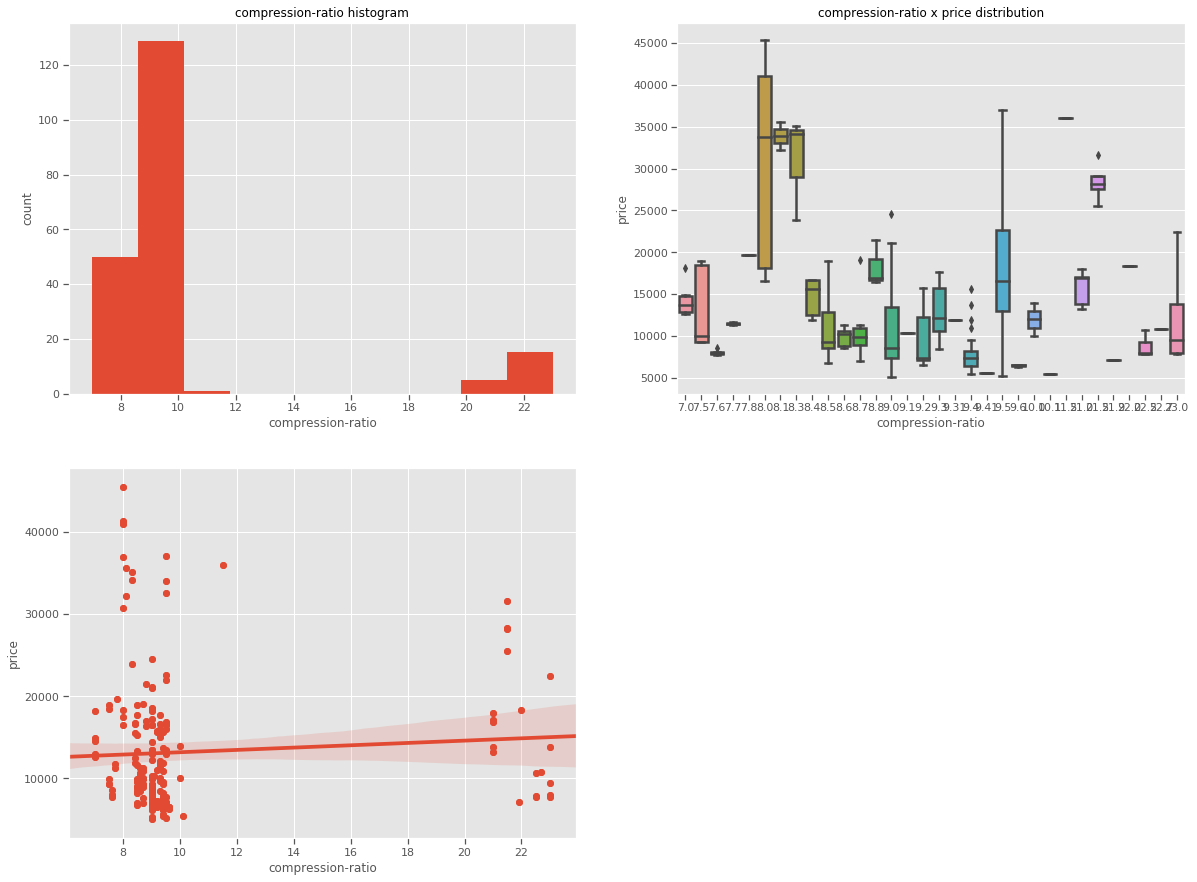

In [47]:
print(df['compression-ratio'].nunique())

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1).hist(df['compression-ratio'])
# set x/y labels and plot title
plt.xlabel("compression-ratio")
plt.ylabel("count")
plt.title("compression-ratio histogram")

plt.subplot(2, 2, 2)
# set x/y labels and plot title
plt.xlabel("compression-ratio")
plt.ylabel("price")
plt.title("compression-ratio x price distribution")
sns.boxplot(x="compression-ratio", y="price", data=df)

pearson_coef, p_value = stats.pearsonr(df['compression-ratio'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

plt.subplot(2, 2, 3).scatter(df['compression-ratio'],df['price'])
sns.regplot(x="compression-ratio", y="price", data=df)
df[['compression-ratio','price']].corr()

In [48]:
df.drop('compression-ratio', axis = 1, inplace=True)

<a id='24'></a>
## horsepower
- <b>Definition</b>: The power an engine produces is called horsepower. In mathematical terms, one horsepower is the power needed to move 550 pounds one foot in one second, or the power needed to move 33,000 pounds one foot in one minute
- <b>Analysis</b>:This variable is ranging from 48 to 288, it has 59 unique values. We are going to divide those in three groups: high horsepower, medium horsepower, and little horsepower.
- <b>Correlation</b>: The correlation between price and normalized-losses is strong (0.81). 
- <b>Assumption</b>: This Variable will impact on the predictive model.

59
The Pearson Correlation Coefficient is 0.809656557536561  with a P-value of P =   1.0468839625927351e-47


,horsepower,price
horsepower,1.000000,0.809657
price,0.809657,1.000000


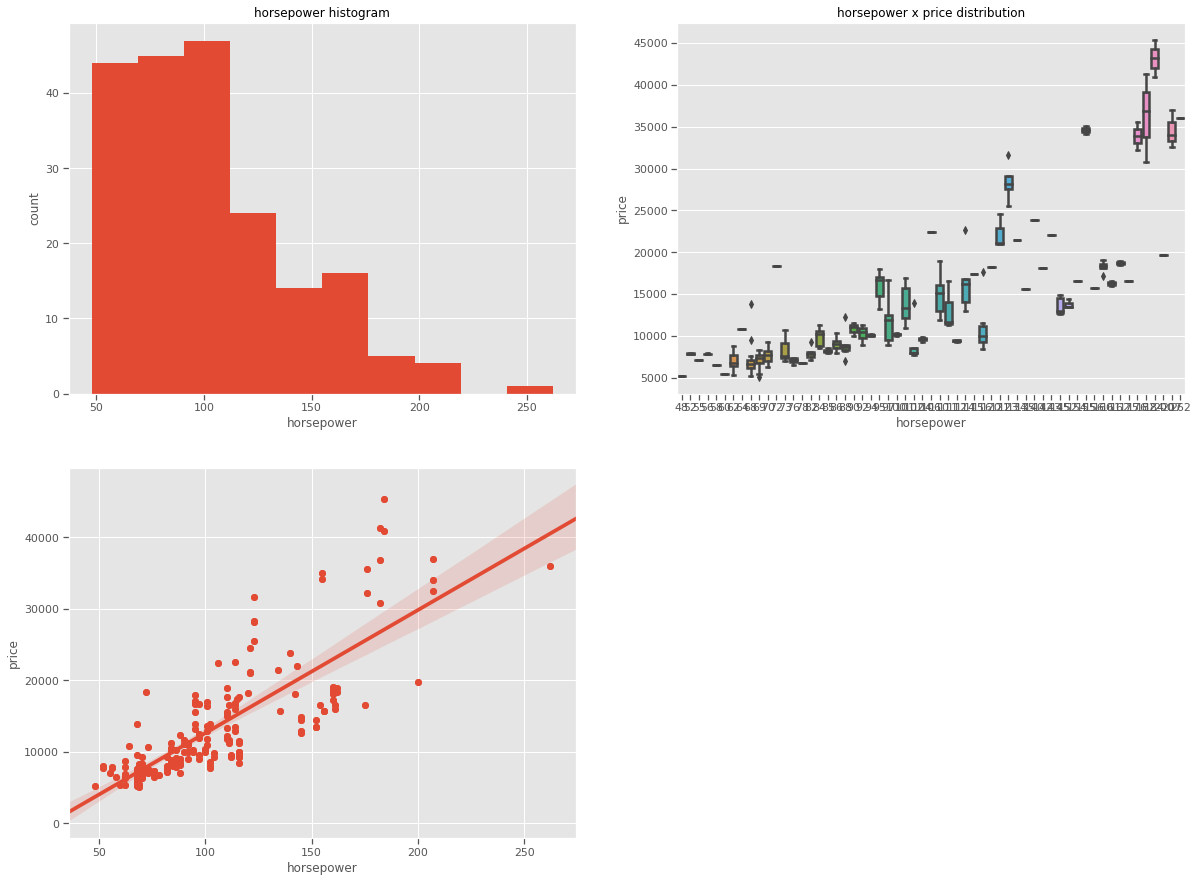

In [49]:
print(df['horsepower'].nunique())

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1).hist(df['horsepower'])
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower histogram")

plt.subplot(2, 2, 2)
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("price")
plt.title("horsepower x price distribution")
sns.boxplot(x="horsepower", y="price", data=df)

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

plt.subplot(2, 2, 3).scatter(df['horsepower'],df['price'])
sns.regplot(x="horsepower", y="price", data=df)
df[['horsepower','price']].corr()

In [50]:
#binning horsepower in 3 different groups
bins_hp = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins_hp
#bin_names = ['Low', 'Medium', 'High']
bin_names = [0,1,2]
df['horsepower-binned'] = pd.cut(df['horsepower'], bins_hp, labels=bin_names, include_lowest=True )



#dropping horsepower and renaming horsepower binned to horse power
df.drop('horsepower', axis = 1, inplace=True)
df = df.rename(columns={'horsepower-binned': "horsepower"})
df["horsepower"]=df["horsepower"].astype(int, copy=True)

<a id='25'></a>
## peak-rpm
- <b>Definition</b>: The power band of an internal combustion engine or electric motor is the range of operating speeds under which the engine or motor is able to operate most efficiently.
- <b>Analysis</b>:The values for this feature are spreadout when compared to price. Most of the values are distributed between 4500-5700.
- <b>Correlation</b>: The correlation between price and normalized-losses is week (-0.10). 
- <b>Assumption</b>: This Variable won't have impact on the predictive model.

23
The Pearson Correlation Coefficient is -0.1015927507820786  with a P-value of P =   0.1523043979301661


,peak-rpm,price
peak-rpm,1.000000,-0.101593
price,-0.101593,1.000000


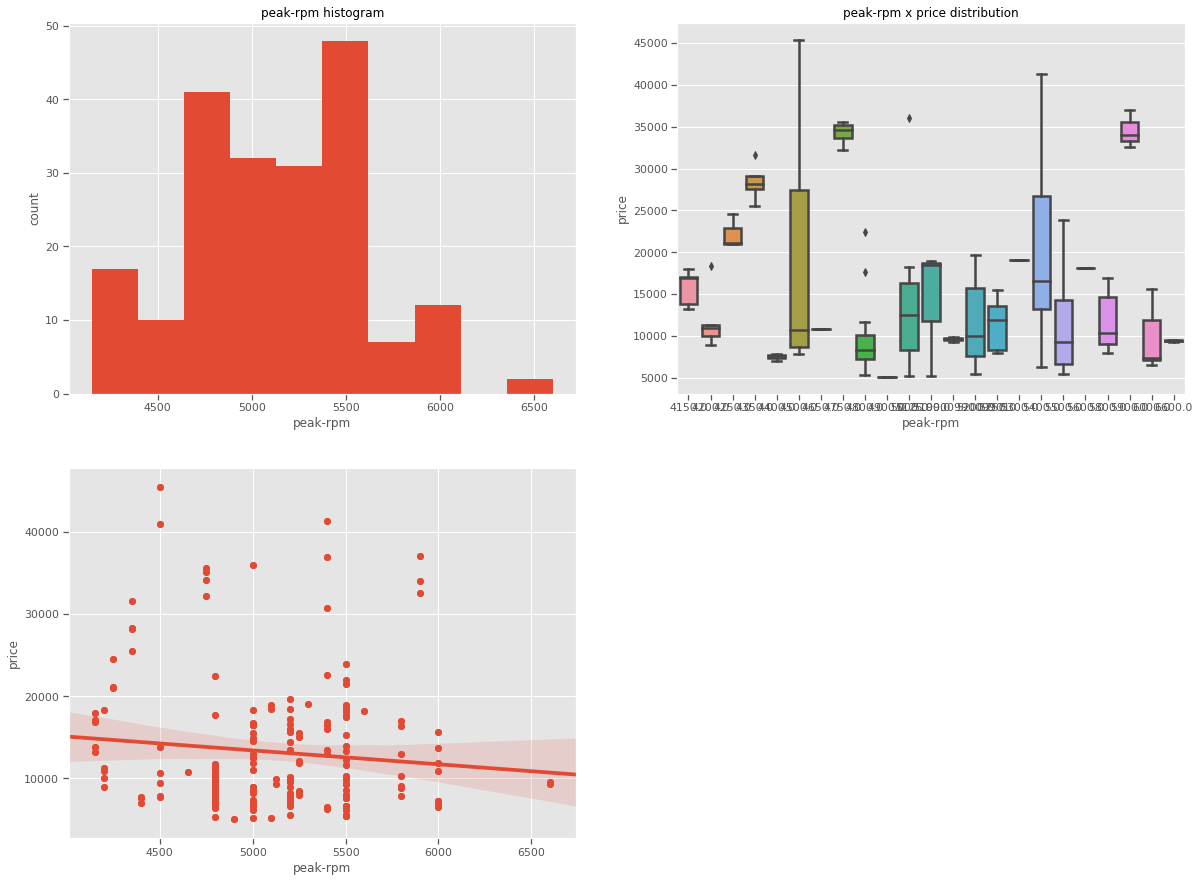

In [51]:
print(df['peak-rpm'].nunique())

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1).hist(df['peak-rpm'])
# set x/y labels and plot title
plt.xlabel("peak-rpm")
plt.ylabel("count")
plt.title("peak-rpm histogram")

plt.subplot(2, 2, 2)
# set x/y labels and plot title
plt.xlabel("peak-rpm")
plt.ylabel("price")
plt.title("peak-rpm x price distribution")
sns.boxplot(x="peak-rpm", y="price", data=df)

pearson_coef, p_value = stats.pearsonr(df['peak-rpm'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

plt.subplot(2, 2, 3).scatter(df['peak-rpm'],df['price'])
sns.regplot(x="peak-rpm", y="price", data=df)
df[['peak-rpm','price']].corr()

In [52]:
df.drop('peak-rpm', axis = 1, inplace=True)

<a id='26'></a>
## Fuel Economy
The following parameters are related to fuel-economy:
- city-mpg(city-L/100km): The acronym mpg stands for Miles Per Gallon – a measure of how far a car can travel if you put just one gallon of petrol or diesel in its tank. This standardised figure helps you compare cars based on their efficiency but doesn't always reflect their real-world fuel economy.
- highway-mpg(highway-L/100km): Fuel Economy. For gasoline vehicles, the label shows City, Highway, and Combined MPG (miles per gallon) values. The Combined MPG value is the most prominent for the purpose of quick and easy comparison across vehicles.

Below we can see the correlation between these characteristics and note that they are correlated. We are going to use the feature highway-L/100km only for our predictive model as it represents the best correlation with price.

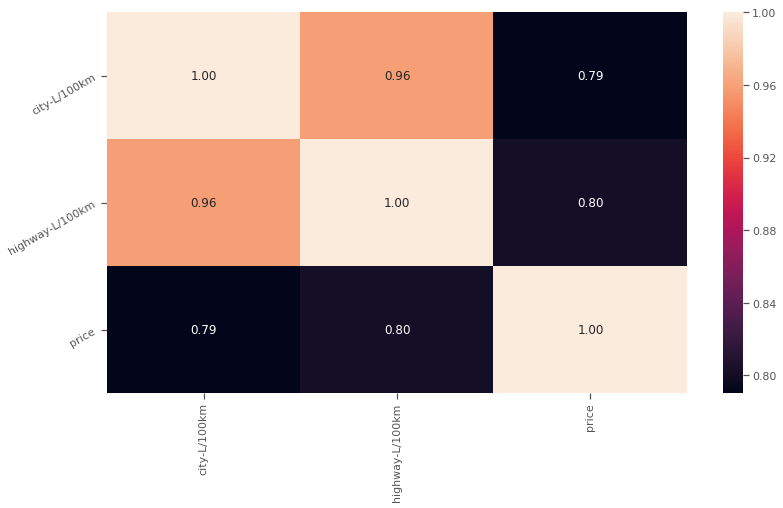

In [53]:
corr_f_eco = df[['city-L/100km','highway-L/100km','price']].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr_f_eco, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

df.drop(['city-L/100km'], axis = 1, inplace=True)

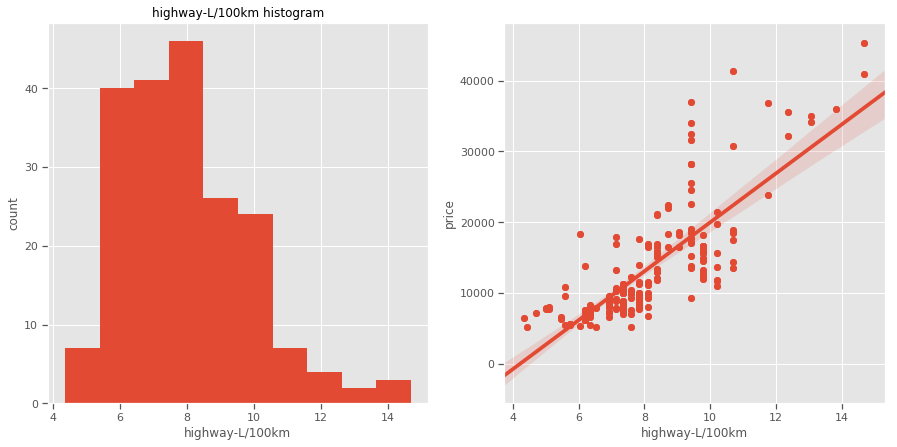

In [54]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1).hist(df['highway-L/100km'])
# set x/y labels and plot title
plt.xlabel("highway-L/100km")
plt.ylabel("count")
plt.title("highway-L/100km histogram")

plt.subplot(1, 2, 2).scatter(df['highway-L/100km'],df['price'])
sns.regplot(x="highway-L/100km", y="price", data=df)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
curb-weight        200 non-null int64
bore               200 non-null float64
price              200 non-null float64
highway-L/100km    200 non-null float64
d_whe_4wd          200 non-null uint8
d_whe_fwd          200 non-null uint8
d_whe_rwd          200 non-null uint8
e_loc_front        200 non-null uint8
e_loc_rear         200 non-null uint8
n_cyl_5            200 non-null uint8
n_cyl_4            200 non-null uint8
n_cyl_rare         200 non-null uint8
n_cyl_6            200 non-null uint8
horsepower         200 non-null int32
dtypes: float64(3), int32(1), int64(1), uint8(9)
memory usage: 8.9 KB


In [56]:
df.describe()

,curb-weight,bore,price,highway-L/100km,d_whe_4wd,d_whe_fwd,d_whe_rwd,e_loc_front,e_loc_rear,n_cyl_5,n_cyl_4,n_cyl_rare,n_cyl_6,horsepower
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2555.705000,3.329981,13205.690000,8.041663,0.040000,0.590000,0.370000,0.985000,0.015000,0.050000,0.780000,0.050000,0.120000,0.265000
std,518.594552,0.268562,7966.982558,1.844764,0.196451,0.493068,0.484016,0.121857,0.121857,0.218492,0.415286,0.218492,0.325777,0.495989
min,1488.000000,2.540000,5118.000000,4.351852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2163.000000,3.150000,7775.000000,6.911765,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2414.000000,3.310000,10270.000000,7.833333,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2928.250000,3.582500,16500.750000,9.400000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4066.000000,3.940000,45400.000000,14.687500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [57]:
'''REMOVE ALL OULIERS FROM DATASET BEFORE STARTING ML MODEL
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
all(axis=1) ensures that for each row, all column satisfy the constraint.
Finally, result of this condition is used to index the dataframe.'''

'REMOVE ALL OULIERS FROM DATASET BEFORE STARTING ML MODEL\nfrom scipy import stats\ndf[(np.abs(stats.zscore(df)) < 3).all(axis=1)]\nFor each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.\nThen is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.\nall(axis=1) ensures that for each row, all column satisfy the constraint.\nFinally, result of this condition is used to index the dataframe.'

<a id='27'></a>
## <h3> Important Features</h3>
<p>Finally we have a better understanding of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Curb-weight</li>
    <li>Bore</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    </ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
    <li>Engine-location</li>
    <li>Num-of-Cylinders</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>



In [58]:
#saving cleaned csv
df.to_csv('clean_df.csv')